# Final Project
## HomeCredit
### Nagin TEAM

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
157987,283136,0,Cash loans,M,N,Y,0,225000.0,253737.0,26775.0,229500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-18595,-1828,-284.0,-1866,NaN,1,1,0,1,0,0,Managers,2.0,2,2,TUESDAY,12,0,0,0,0,0,0,Construction,0.56676,0.602472,0.459690,0.2186,0.1371,0.9801,0.728,0.0408,0.24,0.2069,0.3333,0.3750,0.1052,0.1765,0.2023,0.0077,0.0144,0.2227,0.1423,0.9801,0.7387,0.0411,0.2417,0.2069,0.3333,0.3750,0.1076,0.1928,0.2108,0.0078,0.0152,0.2207,0.1371,0.9801,0.7316,0.0410,0.24,0.2069,0.3333,0.3750,0.1071,0.1796,0.2059,0.0078,0.0147,reg oper account,block of flats,0.1845,Panel,No,7.0,2.0,7.0,0.0,-552.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
149339,273143,0,Cash loans,F,N,Y,0,72000.0,284400.0,16011.0,225000.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.018850,-24360,365243,-10770.0,-4319,NaN,1,0,0,1,0,0,NaN,2.0,2,2,SATURDAY,14,0,0,0,0,0,0,XNA,NaN,0.615386,0.694093,0.1732,0.2452,0.9856,NaN,NaN,0.20,0.1724,0.3333,NaN,NaN,NaN,0.1019,NaN,0.1944,0.1765,0.2545,0.9856,NaN,NaN,0.2014,0.1724,0.3333,NaN,NaN,NaN,0.1061,NaN,0.2058,0.1749,0.2452,0.9856,NaN,NaN,0.20,0.1724,0.3333,NaN,NaN,NaN,0.1037,NaN,0.1985,NaN,block of flats,0.2011,Panel,No,2.0,0.0,2.0,0.0,-334.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
268483,411135,0,Cash loans,M,N,Y,0,112500.0,314055.0,14683.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-20611,-7358,-7344.0,-4168,NaN,1,1,1,1,0,0,Laborers,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,School,NaN,0.445566,0.733815,0.1247,0.0845,0.9801,0.728,0.0091,0.00,0.0690,0.1667,0.2083,0.0792,0.1009,0.0645,0.0039,0.0020,0.1271,0.0877,0.9801,0.7387,0.0091,0.0000,0.0690,0.1667,0.2083,0.0810,0.1102,0.0672,0.0039,0.0021,0.1260,0.0845,0.980

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Missing Value

In [5]:
df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [6]:
df.shape

(307511, 122)

In [7]:
percentage_missing = df.isnull().sum()/(df.shape[0])
misscol = list(percentage_missing[percentage_missing>0.6].index)

In [8]:
df.drop(columns=misscol, inplace = True)

In [9]:
cats = list(df.select_dtypes('object').columns)
nums = list(df.select_dtypes('number').columns)

## Imputasi Numeric

In [10]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [11]:
df[nums].isna().sum()/df.shape[0]*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_

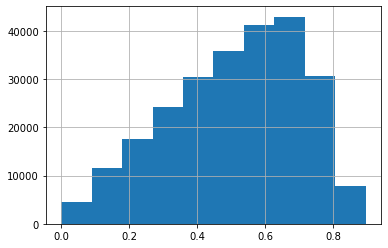

In [12]:
df['EXT_SOURCE_3'].hist()
plt.show()

df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].median(), inplace=True)

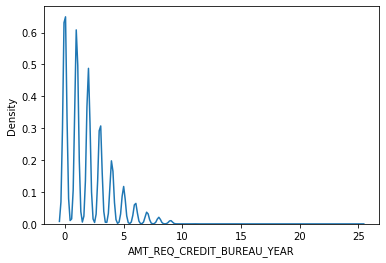

In [13]:
sns.kdeplot(data=df['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

In [14]:
df[nums] = df[nums].fillna(0)

In [15]:
df[nums].isna().sum()

SK_ID_CURR                     0
TARGET                         0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
OBS_30_CNT

## Imputasi Categorical

In [16]:
df[cats].describe().transpose()

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


In [17]:
df['ORGANIZATION_TYPE'].fillna('Unknown', inplace = True)

In [18]:
df[cats].isna().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               96391
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [19]:
df['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)

In [20]:
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [21]:
df[cats].isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [22]:
df.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

## Inconsistency Data

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.000000,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.000000,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.000000,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27107.516051,14494.443757,0.000000,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,537909.479651,369633.752648,0.000000,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.000290,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.000000,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.000000,-2760.000000,-1213.000000,-289.000000,3.652430e+05


## Duplicated Value

In [24]:
df.duplicated().sum()

0

In [25]:
df = df.reset_index(drop=True)

In [26]:
df.shape

(307511, 73)

## Normalization

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
df['DAYS_BIRTH_NORM'] = MinMaxScaler().fit_transform(df['DAYS_BIRTH'].values.reshape(len(df),1))
df['DAYS_EMPLOYED_NORM'] = MinMaxScaler().fit_transform(df['DAYS_EMPLOYED'].values.reshape(len(df),1))
df['DAYS_REGISTRATION_NORM'] = MinMaxScaler().fit_transform(df['DAYS_REGISTRATION'].values.reshape(len(df),1))
df['DAYS_ID_PUBLISH_NORM'] = MinMaxScaler().fit_transform(df['DAYS_ID_PUBLISH'].values.reshape(len(df),1))

In [29]:
df['DAYS_LAST_PHONE_CHANGE_NORM'] = MinMaxScaler().fit_transform(df['DAYS_LAST_PHONE_CHANGE'].values.reshape(len(df),1))

## Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
df['AMT_INCOME_TOTAL_STD'] = StandardScaler().fit_transform(df['AMT_INCOME_TOTAL'].values.reshape(len(df),1))
df['AMT_CREDIT_STD'] = StandardScaler().fit_transform(df['AMT_CREDIT'].values.reshape(len(df),1))
df['AMT_ANNUITY_STD'] = StandardScaler().fit_transform(df['AMT_ANNUITY'].values.reshape(len(df),1))
df['AMT_GOODS_PRICE_STD'] = StandardScaler().fit_transform(df['AMT_GOODS_PRICE'].values.reshape(len(df),1))

## Encoding

In [32]:
df[cats].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,2,3,2,2,7,8,5,6,6,19,7,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Unknown,TUESDAY,Business Entity Type 3
freq,278232,202448,202924,213312,249818,158774,218391,196432,272868,96391,53901,67992


In [33]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [34]:
ordinals = pd.DataFrame(encoder.fit_transform(df[cats]),columns = cats)

In [35]:
ordinals

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,6.0,5.0
1,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,39.0
2,1.0,1.0,1.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,1.0,11.0
3,0.0,0.0,0.0,1.0,6.0,7.0,4.0,0.0,1.0,8.0,6.0,5.0
4,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,3.0,4.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,0.0,6.0,7.0,4.0,2.0,5.0,14.0,4.0,43.0
307507,0.0,0.0,0.0,1.0,6.0,3.0,4.0,5.0,1.0,17.0,1.0,57.0
307508,0.0,0.0,0.0,1.0,6.0,7.0,1.0,2.0,1.0,10.0,4.0,39.0
307509,0.0,0.0,0.0,1.0,6.0,1.0,4.0,1.0,1.0,8.0,6.0,3.0


In [36]:
df[cats] = ordinals

In [37]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_NORM,DAYS_EMPLOYED_NORM,DAYS_REGISTRATION_NORM,DAYS_ID_PUBLISH_NORM,DAYS_LAST_PHONE_CHANGE_NORM,AMT_INCOME_TOTAL_STD,AMT_CREDIT_STD,AMT_ANNUITY_STD,AMT_GOODS_PRICE_STD
0,100002,1,0.0,1.0,0.0,1.0,0,202500.0,406597.5,24700.5,351000.0,6.0,7.0,4.0,3.0,1.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,8.0,1.0,2,2,6.0,10,0,0,0,0,0,0,5.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.888839,0.045086,0.852140,0.705433,0.735788,0.142129,-0.478095,-0.166065,-0.505662
1,100003,0,0.0,0.0,0.0,0.0,0,270000.0,1293502.5,35698.5,1129500.0,1.0,4.0,1.0,1.0,1.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,3.0,2.0,1,1,1.0,11,0,0,0,0,0,0,39.0,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.477114,0.043648,0.951929,0.959566,0.807083,0.426792,1.725450,0.592710,1.600480
2,100004,0,1.0,1.0,1.0,1.0,0,67500.0,135000.0,6750.0,135000.0,6.0,7.0,4.0,3.0,1.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,8.0,1.0,2,2,1.0,9,0,0,0,0,0,0,11.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.348534,0.046161,0.827335,0.648326,0.810112,-0.427196,-1.152888,-1.404507,-1.090025
3,100006,0,0.0,0.0,0.0,1.0,0,135000.0,312682.5,29686.5,297000.0,6.0,7.0,4.0,0.0,1.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,8.0,2.0,2,2,6.0,17,0,0,0,0,0,0,5.0,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.350846,0.038817,0.601451,0.661387,0.856244,-0.142533,-0.711430,0.177929,-0.651753
4,100007,0,0.0,1.0,0.0,1.0,0,121500.0,513000.0,21865.5,513000.0,6.0,7.0,4.0,3.0,1.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,3.0,1.0,2,2,4.0,11,0,0,0,0,1,1,37.0,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.298591,0.038820,0.825268,0.519522,0.742311,-0.199466,-0.213734,-0.361658,-0.067390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0.0,1.0,0.0,0.0,0,157500.0,254700.0,27558.0,225000.0,6.0,7.0,4.0,2.0,5.0,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,14.0,1.0,1,1,4.0,15,0,0,0,0,0,0,43.0,0.681632,0.535276,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.896392,0.046133,0.657263,0.724607,0.936393,-0.047646,-0.855489,0.031080,-0.846541
30

In [38]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,307411,307412,307413,307414,307415,307416,307417,307418,307419,307420,307421,307422,307423,307424,307425,307426,307427,307428,307429,307430,307431,307432,307433,307434,307435,307436,307437,307438,307439,307440,307441,307442,307443,307444,307445,307446,307447,307448,307449,307450,307451,307452,307453,307454,307455,307456,307457,307458,307459,307460,307461,307462,307463,307464,307465,307466,307467,307468,307469,307470,307471,307472,307473,307474,307475,307476,307477,307478,307479,307480,307481,307482,307483,307484,307485,307486,307487,307488,307489,307490,307491,307492,307493,307494,307495,307496,307497,307498,307499,307500,307501,307502,307503,307504,307505,307506,307507,307508,307509,307510
SK_ID_CURR,100002.000000,1.000030e+05,100004.000000,100006.000000,100007.000000,100008.000000,1.000090e+05,1.000100e+05,1.000110e+05,100012.000000,100014.000000,100015.000000,100016.000000,100017.000000,100018.000000,100019.000000,100020.000000,100021.000000,100022.000000,100023.000000,100024.000000,1.000250e+05,100026.000000,100027.000000,100029.000000,100030.000000,100031.000000,100032.000000,100033.000000,100034.000000,100035.000000,100036.000000,100037.000000,100039.000000,1.000400e+05,100041.000000,100043.000000,100044.000000,100045.000000,100046.000000,1.000470e+05,100048.000000,100049.000000,100050.000000,100051.000000,100052.000000,100053.000000,100054.000000,1.000550e+05,1.000560e+05,100058.000000,100059.000000,100060.000000,100061.000000,100062.000000,100063.000000,100064.000000,100068.000000,100069.000000,1.000700e+05,1.000710e+05,1.000720e+05,1.000730e+05,100075.000000,100076.000000,1.000770e+05,1.000780e+05,100079.000000,100080.000000,100081.000000,100082.000000,100083.000000,100084.000000,100085.000000,100086.000000,1.000870e+05,100088.000000,100089.000000,100093.000000,100094.000000,100095.000000,100096.000000,100097.000000,100098.000000,100099.000000,100100.000000,100101.000000,100102.000000,100103.000000,100104.000000,100105.000000,100108.000000,100110.000000,100111.000000,100112.000000,100113.000000,100114.000000,100115.000000,100116.000000,100118.000000,...,456144.000000,456145.000000,456146.000000,4.561470e+05,456148.000000,456149.000000,456150.000000,456151.000000,456152.000000,4.561530e+05,456154.000000,4.561550e+05,456156.000000,456157.000000,456158.000000,456159.000000,4.561600e+05,4.561610e+05,456162.000000,456163.000000,456164.000000,456165.000000,456171.000000,456172.000000,456173.000000,456174.000000,456175.000000,4.561760e+05,456177.000000,456178.000000,456179.000000,456180.000000,4.561810e+05,456182.000000,456183.000000,456184.000000,456185.000000,456186.000000,4.561870e+05,456188.000000,456190.000000,4.561910e+05,456192.000000,4.561930e+05,456194.000000,456195.000000,456196.000000,456197.000000,456198.000000,456199.000000,456200.000000,4.562010e+05,456203.000000,456204.000000,456205.000000,456206.000000,456207.000000,456208.000000,456209.000000,456210.000000,456211.000000,456212.000000,456213.000000,456214.000000,4.562150e+05,4.562160e+05,456217.000000,4.562180e+05,456219.000000,4.562200e+05,456225.000000,456226.000000,456227.000000,456228.000000,456229.000000,456230.000000,4.562310e+05,456232.000000,456233.000000,456234.000000,4.562350e+05,4.562360e+05,456237.000000,456238.000000,456239.000000,456240.000000,456241.000000,4.562420e+05,456243.000000,4.562440e+05,456245.000000,456246.000000,456247.000000,456248.000000,456249.000000,456251.000000,456252.000000,456253.000000,456254.000000,456255.000000
TARGET,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0

In [39]:
df.drop(columns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'], inplace = True)

In [40]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_NORM,DAYS_EMPLOYED_NORM,DAYS_REGISTRATION_NORM,DAYS_ID_PUBLISH_NORM,DAYS_LAST_PHONE_CHANGE_NORM,AMT_INCOME_TOTAL_STD,AMT_CREDIT_STD,AMT_ANNUITY_STD,AMT_GOODS_PRICE_STD
0,100002,1,0.0,1.0,0.0,1.0,0,6.0,7.0,4.0,3.0,1.0,0.018801,1,1,0,1,1,0,8.0,1.0,2,2,6.0,10,0,0,0,0,0,0,5.0,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.888839,0.045086,0.852140,0.705433,0.735788,0.142129,-0.478095,-0.166065,-0.505662
1,100003,0,0.0,0.0,0.0,0.0,0,1.0,4.0,1.0,1.0,1.0,0.003541,1,1,0,1,1,0,3.0,2.0,1,1,1.0,11,0,0,0,0,0,0,39.0,0.622246,0.535276,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.477114,0.043648,0.951929,0.959566,0.807083,0.426792,1.725450,0.592710,1.600480
2,100004,0,1.0,1.0,1.0,1.0,0,6.0,7.0,4.0,3.0,1.0,0.010032,1,1,1,1,1,0,8.0,1.0,2,2,1.0,9,0,0,0,0,0,0,11.0,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.348534,0.046161,0.827335,0.648326,0.810112,-0.427196,-1.152888,-1.404507,-1.090025
3,100006,0,0.0,0.0,0.0,1.0,0,6.0,7.0,4.0,0.0,1.0,0.008019,1,1,0,1,0,0,8.0,2.0,2,2,6.0,17,0,0,0,0,0,0,5.0,0.650442,0.535276,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.350846,0.038817,0.601451,0.661387,0.856244,-0.142533,-0.711430,0.177929,-0.651753
4,100007,0,0.0,1.0,0.0,1.0,0,6.0,7.0,4.0,3.0,1.0,0.028663,1,1,0,1,0,0,3.0,1.0,2,2,4.0,11,0,0,0,0,1,1,37.0,0.322738,0.535276,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.298591,0.038820,0.825268,0.519522,0.742311,-0.199466,-0.213734,-0.361658,-0.067390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0.0,1.0,0.0,0.0,0,6.0,7.0,4.0,2.0,5.0,0.032561,1,1,0,1,0,0,14.0,1.0,1,1,4.0,15,0,0,0,0,0,0,43.0,0.681632,0.535276,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.896392,0.046133,0.657263,0.724607,0.936393,-0.047646,-0.855489,0.031080,-0.846541
307507,456252,0,0.0,0.0,0.0,1.0,0,6.0,3.0,4.0,5.0,1.0,0.025164,1,0,0,1,1,0,17.0,1.0,2,2,1.0,8,0,0,0,0,0,0,57.0,0.115992,0.535276,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.251071,1.000000,0.822147,0.431708,1.000000,-0.408219,-0.818594,-1.042195,-0.846541
307508,456253,0,0.0,0.0,0.0,1.0,0,6.0,7.0,1.0,2.0,1.0,0.005002,1,1,0,1,0,1,10.0,1.0,3,3,4.0,9,0,0,0,0,1,1,39.0,0.535722,0.218859,6.0,0.0,6.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.578523,0.026076,0.726937,0.284424,0.555219,-0.066623,0.195379,0.198110,0.127398
3

## Train Test Split

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [43]:
# Memisahkan Independent Variabel dengan Dependent Variabel
X = df.drop(['SK_ID_CURR','TARGET'],1)
y = df['TARGET']

In [44]:
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_NORM,DAYS_EMPLOYED_NORM,DAYS_REGISTRATION_NORM,DAYS_ID_PUBLISH_NORM,DAYS_LAST_PHONE_CHANGE_NORM,AMT_INCOME_TOTAL_STD,AMT_CREDIT_STD,AMT_ANNUITY_STD,AMT_GOODS_PRICE_STD
0,0.0,1.0,0.0,1.0,0,6.0,7.0,4.0,3.0,1.0,0.018801,1,1,0,1,1,0,8.0,1.0,2,2,6.0,10,0,0,0,0,0,0,5.0,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.888839,0.045086,0.852140,0.705433,0.735788,0.142129,-0.478095,-0.166065,-0.505662
1,0.0,0.0,0.0,0.0,0,1.0,4.0,1.0,1.0,1.0,0.003541,1,1,0,1,1,0,3.0,2.0,1,1,1.0,11,0,0,0,0,0,0,39.0,0.622246,0.535276,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.477114,0.043648,0.951929,0.959566,0.807083,0.426792,1.725450,0.592710,1.600480
2,1.0,1.0,1.0,1.0,0,6.0,7.0,4.0,3.0,1.0,0.010032,1,1,1,1,1,0,8.0,1.0,2,2,1.0,9,0,0,0,0,0,0,11.0,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.348534,0.046161,0.827335,0.648326,0.810112,-0.427196,-1.152888,-1.404507,-1.090025
3,0.0,0.0,0.0,1.0,0,6.0,7.0,4.0,0.0,1.0,0.008019,1,1,0,1,0,0,8.0,2.0,2,2,6.0,17,0,0,0,0,0,0,5.0,0.650442,0.535276,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.350846,0.038817,0.601451,0.661387,0.856244,-0.142533,-0.711430,0.177929,-0.651753
4,0.0,1.0,0.0,1.0,0,6.0,7.0,4.0,3.0,1.0,0.028663,1,1,0,1,0,0,3.0,1.0,2,2,4.0,11,0,0,0,0,1,1,37.0,0.322738,0.535276,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.298591,0.038820,0.825268,0.519522,0.742311,-0.199466,-0.213734,-0.361658,-0.067390


In [45]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

## Imbalance Dataset

### Random UnderSampling

In [46]:
from imblearn.under_sampling import RandomUnderSampler

In [47]:
undersampling = RandomUnderSampler(random_state=123)

In [48]:
X_under,y_under = undersampling.fit_resample(X,y)

In [49]:
X_under.shape

(49650, 71)

In [50]:
y_under.value_counts(normalize = True)

1    0.5
0    0.5
Name: TARGET, dtype: float64

In [51]:
X_under.sample(5)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_NORM,DAYS_EMPLOYED_NORM,DAYS_REGISTRATION_NORM,DAYS_ID_PUBLISH_NORM,DAYS_LAST_PHONE_CHANGE_NORM,AMT_INCOME_TOTAL_STD,AMT_CREDIT_STD,AMT_ANNUITY_STD,AMT_GOODS_PRICE_STD
43146,0.0,0.0,1.0,1.0,0,6.0,7.0,1.0,1.0,1.0,0.010006,1,1,0,1,0,0,17.0,2.0,2,2,4.0,14,0,0,0,0,0,0,26.0,0.676725,0.535276,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.495716,0.045616,0.737314,0.513964,0.996738,-0.009691,1.843459,0.834872,2.172669
35898,0.0,1.0,0.0,1.0,0,6.0,7.0,4.0,2.0,1.0,0.019689,1,1,0,1,1,0,8.0,1.0,2,2,0.0,8,0,1,1,0,1,1,0.0,0.317863,0.535276,4.0,0.0,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.394419,0.045707,0.748906,0.845352,0.895853,-0.142533,-1.171895,-0.915215,-1.150896
13319,0.0,0.0,0.0,0.0,0,6.0,1.0,4.0,1.0,4.0,0.030755,1,1,1,1,1,0,0.0,2.0,2,2,1.0,19,0,0,0,1,0,1,5.0,0.619533,0.535276,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.764656,0.043552,0.873906,0.631374,0.467148,-0.294354,1.865820,0.853189,2.197018
22548,0.0,1.0,1.0,1.0,1,6.0,7.0,4.0,1.0,1.0,0.035792,1,1,0,1,0,0,8.0,3.0,2,2,1.0,14,0,0,0,0,1,1,5.0,0.728474,0.551381,3.0,0.0,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0.409414,0.039605,0.752918,0.793108,1.000000,-0.104578,-1.045523,-0.941915,-1.065677
26547,0.0,0.0,0.0,0.0,0,6.0,7.0,2.0,3.0,1.0,0.020246,1,1,0,1,0,0,17.0,1.0,3,3,6.0,7,0,0,0,0,0,0,42.0,0.291330,0.535276,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.770631,0.046208,0.980828,0.526053,1.000000,-0.237421,-0.675798,-0.401397,-0.724798


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_under,y_under,test_size = 0.3,
                                                 stratify = y_under, random_state = 123)

In [53]:
X_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_NORM,DAYS_EMPLOYED_NORM,DAYS_REGISTRATION_NORM,DAYS_ID_PUBLISH_NORM,DAYS_LAST_PHONE_CHANGE_NORM,AMT_INCOME_TOTAL_STD,AMT_CREDIT_STD,AMT_ANNUITY_STD,AMT_GOODS_PRICE_STD
7738,0.0,1.0,1.0,1.0,1,1.0,7.0,4.0,1.0,1.0,0.018029,1,1,0,1,0,0,4.0,3.0,3,3,1.0,8,0,0,0,0,1,1,5.0,0.509551,0.492060,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.487880,0.046031,0.975113,0.984994,1.000000,0.578612,0.815488,-0.027908,0.638716
28479,0.0,0.0,0.0,0.0,0,6.0,1.0,1.0,1.0,1.0,0.046220,1,1,0,1,0,0,10.0,2.0,1,1,5.0,15,0,1,1,0,0,0,5.0,0.584287,0.173527,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.732976,0.044817,0.930245,0.760873,0.999534,0.711455,4.418506,2.465741,3.913584
14287,0.0,0.0,0.0,1.0,0,6.0,1.0,1.0,2.0,1.0,0.019101,1,1,0,1,0,0,0.0,1.0,2,2,4.0,10,0,0,0,0,0,0,33.0,0.757135,0.375711,1.0,1.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0.183878,0.046493,0.996798,0.400028,0.767241,-0.294354,-1.220418,-1.533660,-1.211768
10343,0.0,1.0,1.0,1.0,0,6.0,1.0,4.0,1.0,1.0,0.020713,1,1,0,1,1,0,16.0,2.0,3,1,1.0,11,0,0,0,0,0,0,40.0,0.456665,0.434733,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,0.055355,0.045765,0.781899,0.418508,0.924511,0.237017,-1.094996,-0.797239,-1.053503
21011,0.0,0.0,1.0,1.0,0,6.0,7.0,1.0,1.0,5.0,0.028663,1,1,0,1,1,0,14.0,2.0,2,2,0.0,13,0,0,0,0,1,1,51.0,0.732983,0.535276,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.860936,0.044656,0.933771,0.781715,0.834809,-0.142533,1.306800,0.408294,1.588306


In [54]:
y_under.value_counts(normalize = True)

1    0.5
0    0.5
Name: TARGET, dtype: float64

# Modeling

## KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [56]:
prediction = knn.predict(X_test)
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

0.5466935213158778
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      7448
           1       0.54      0.57      0.56      7447

    accuracy                           0.55     14895
   macro avg       0.55      0.55      0.55     14895
weighted avg       0.55      0.55      0.55     14895



## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [58]:
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
prediction = model_tree.predict(X_test)
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

0.5806646525679758
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      7448
           1       0.58      0.58      0.58      7447

    accuracy                           0.58     14895
   macro avg       0.58      0.58      0.58     14895
weighted avg       0.58      0.58      0.58     14895



In [60]:
 params = {'max_depth':[1,3,5,8,10,20,'max']}

In [61]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
            estimator=model_tree,
            param_grid=params,
            scoring = 'accuracy',
            n_jobs=10,
            cv = 3)

In [62]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'max_depth': [1, 3, 5, 8, 10, 20, 'max']},
             scoring='accuracy')

In [63]:
grid.best_params_

{'max_depth': 8}

In [64]:
grid.best_score_

0.6545245288447705

## Logistic Regeression

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [66]:
prediction = logreg.predict(X_test)
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

0.6708291372943941
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      7448
           1       0.67      0.66      0.67      7447

    accuracy                           0.67     14895
   macro avg       0.67      0.67      0.67     14895
weighted avg       0.67      0.67      0.67     14895



In [67]:
 params = {'C':[0.01,0.1,1,2,3,5]}

In [68]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
            estimator=logreg,
            param_grid=params,
            scoring = 'accuracy',
            n_jobs=10,
            cv = 3)

In [69]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': [0.01, 0.1, 1, 2, 3, 5]}, scoring='accuracy')

In [70]:
grid.best_params_

{'C': 3}

In [71]:
grid.best_score_

0.6787800316501222

## XGBoost

In [72]:
from xgboost import XGBClassifier

In [73]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[22:30:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
prediction = xgb.predict(X_test)
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

0.6699563611950319
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      7448
           1       0.67      0.67      0.67      7447

    accuracy                           0.67     14895
   macro avg       0.67      0.67      0.67     14895
weighted avg       0.67      0.67      0.67     14895



## LightGBM

In [75]:
from lightgbm import LGBMClassifier

In [76]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [77]:
prediction = lgbm.predict(X_test)
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

0.6788183954347097
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      7448
           1       0.68      0.68      0.68      7447

    accuracy                           0.68     14895
   macro avg       0.68      0.68      0.68     14895
weighted avg       0.68      0.68      0.68     14895



## Feature Selection

In [78]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_under,y_under)
mutual_info

array([3.62696476e-03, 7.21145102e-03, 5.51968726e-03, 4.67848795e-03,
       7.77355750e-04, 7.44956111e-03, 1.13747431e-02, 1.44820936e-02,
       6.99858592e-03, 1.41140514e-03, 8.21325638e-03, 7.35454232e-03,
       8.06707011e-03, 1.07806947e-03, 8.72970035e-03, 2.47876649e-03,
       1.44484807e-03, 1.11757196e-02, 4.53645086e-03, 8.81346309e-03,
       5.80825259e-03, 8.54459263e-06, 2.51714201e-03, 1.22832560e-03,
       0.00000000e+00, 0.00000000e+00, 1.22271215e-03, 0.00000000e+00,
       2.10107331e-03, 1.16691023e-02, 3.53024352e-02, 3.89267839e-02,
       9.27392513e-04, 1.62698472e-03, 0.00000000e+00, 1.48236651e-03,
       2.07176371e-03, 5.12772635e-03, 2.14892669e-03, 2.51708744e-03,
       8.67855965e-04, 2.84532214e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.10046040e-04, 0.00000000e+00, 2.20466542e-03,
       2.09630270e-03, 0.00000000e+00, 0.00000000e+00, 1.07932456e-03,
       1.11887906e-03, 8.41351422e-04, 2.67465227e-03, 0.00000000e+00,
      

In [79]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_under.columns
mutual_info.sort_values(ascending=False)

EXT_SOURCE_3                   0.038927
AMT_ANNUITY_STD                0.037419
EXT_SOURCE_2                   0.035302
AMT_CREDIT_STD                 0.023131
DAYS_EMPLOYED_NORM             0.017345
NAME_EDUCATION_TYPE            0.014482
AMT_GOODS_PRICE_STD            0.013942
DAYS_BIRTH_NORM                0.012386
ORGANIZATION_TYPE              0.011669
NAME_INCOME_TYPE               0.011375
OCCUPATION_TYPE                0.011176
REGION_RATING_CLIENT           0.008813
FLAG_CONT_MOBILE               0.008730
REGION_POPULATION_RELATIVE     0.008213
FLAG_EMP_PHONE                 0.008067
NAME_TYPE_SUITE                0.007450
FLAG_MOBIL                     0.007355
CODE_GENDER                    0.007211
NAME_FAMILY_STATUS             0.006999
DAYS_REGISTRATION_NORM         0.006179
DAYS_ID_PUBLISH_NORM           0.006131
REGION_RATING_CLIENT_W_CITY    0.005808
FLAG_OWN_CAR                   0.005520
FLAG_DOCUMENT_3                0.005128
DAYS_LAST_PHONE_CHANGE_NORM    0.004799


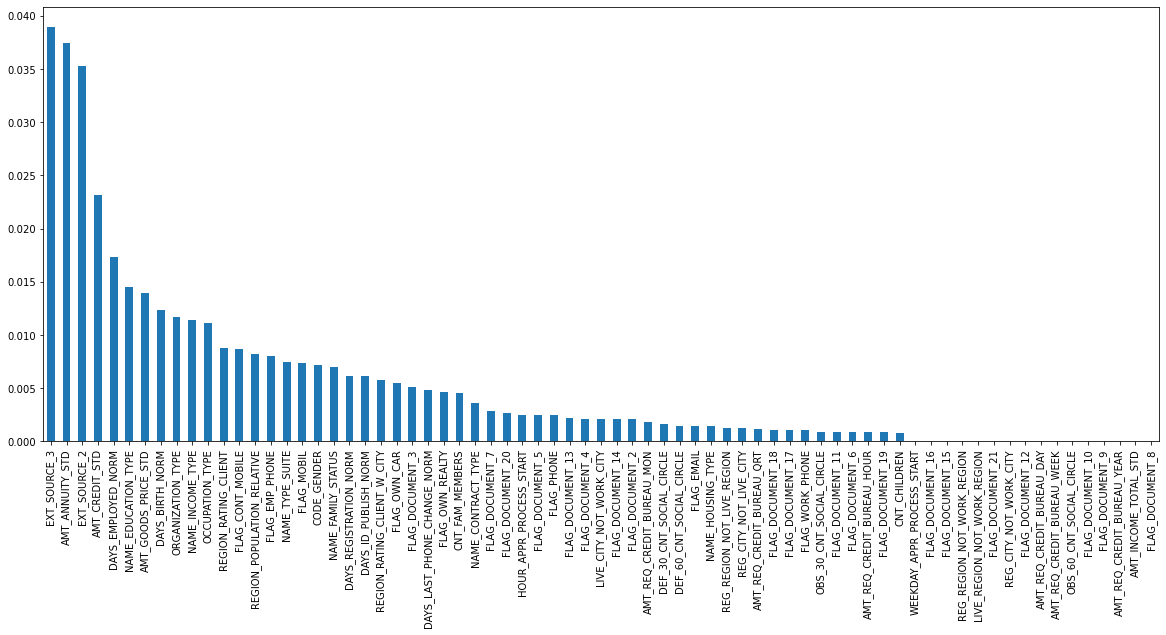

In [80]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.show()

In [81]:
from sklearn.feature_selection import SelectKBest

In [82]:
best_feature = SelectKBest(mutual_info_classif, k = 10)
best_feature.fit(X_under,y_under)
X_under.columns[best_feature.get_support()]

Index(['NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH_NORM', 'DAYS_EMPLOYED_NORM', 'AMT_CREDIT_STD', 'AMT_ANNUITY_STD', 'AMT_GOODS_PRICE_STD'], dtype='object')

In [83]:
X_under_bf = X_under[['NAME_INCOME_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH_NORM', 'DAYS_EMPLOYED_NORM', 'AMT_CREDIT_STD', 'AMT_ANNUITY_STD']]

In [84]:
X_under_bf.corr()

,NAME_INCOME_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH_NORM,DAYS_EMPLOYED_NORM,AMT_CREDIT_STD,AMT_ANNUITY_STD
NAME_INCOME_TYPE,1.000000,-0.132471,-0.161588,-0.172386,-0.088044,-0.049625,0.193011,-0.308527,-0.079696,-0.068336
REGION_POPULATION_RELATIVE,-0.132471,1.000000,0.008175,-0.044435,0.189563,0.006783,-0.049365,0.010022,0.095256,0.104138
OCCUPATION_TYPE,-0.161588,0.008175,1.000000,0.294967,-0.012360,0.048011,-0.286879,0.497860,-0.030553,-0.058599
ORGANIZATION_TYPE,-0.172386,-0.044435,0.294967,1.000000,-0.011574,0.086898,-0.367807,0.598470,-0.033420,-0.065082
EXT_SOURCE_2,-0.088044,0.189563,-0.012360,-0.011574,1.000000,0.122155,-0.129954,0.009205,0.141289,0.130900
EXT_SOURCE_3,-0.049625,0.006783,0.048011,0.086898,0.122155,1.000000,-0.182841,0.111738,0.057700,0.035271
DAYS_BIRTH_NORM,0.193011,-0.049365,-0.286879,-0.367807,-0.129954,-0.182841,1.000000,-0.601082,-0.097100,-0.001053
DAYS_EMPLOYED_NORM,-0.308527,0.010022,0.497860,0.598470,0.009205,0.111738,-0.601082,1.000000,-0.036447,-0.093127
AMT_CREDIT_STD,-0.079696,0.095256,-0.030553,-0.033420,0.141289,0.057700,-0.097100,-0.036447,1.000000,0.763373
AMT_ANNUITY_STD,-0.068336,0.104138,-0.058599,-0.065082,0.130900,0.035271,-0.001053,-0.093127,0.763373,1.000000


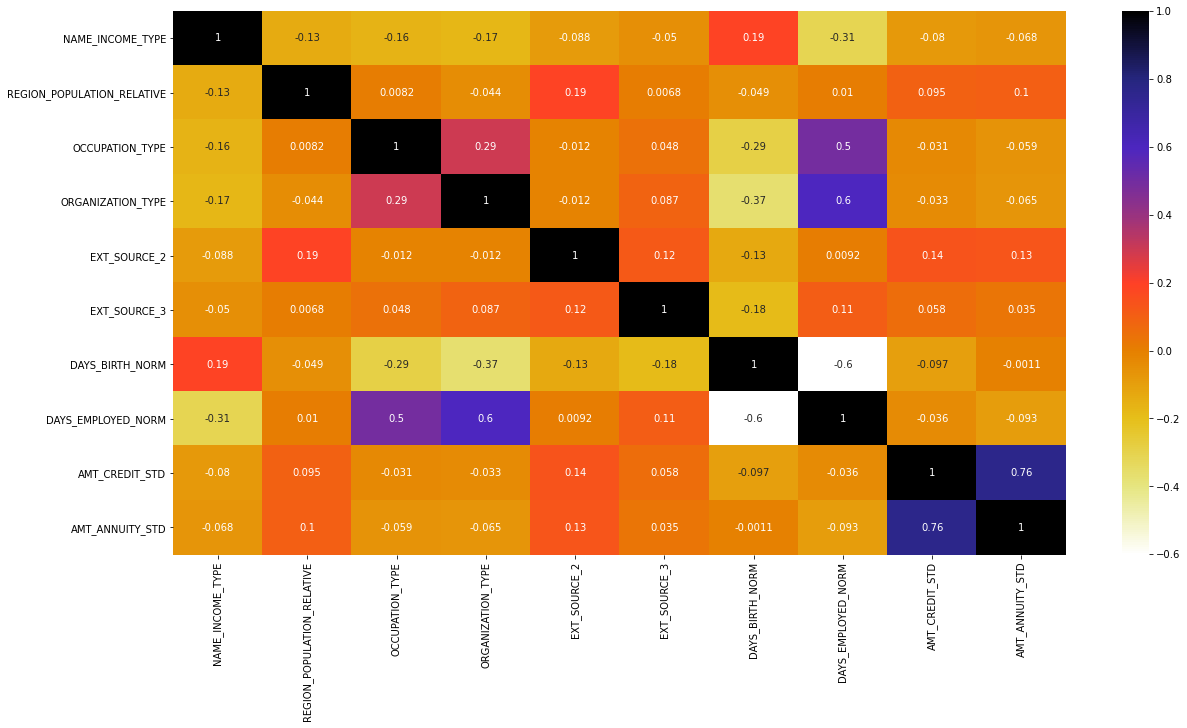

In [85]:
plt.figure(figsize=(20,10))
cor = X_under_bf.corr()
sns.heatmap(cor,annot=True, cmap = plt.cm.CMRmap_r)
plt.show()

In [86]:
def corelation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [87]:
corr_features = corelation(X_under_bf,0.7)
len(set(corr_features))

1

In [88]:
corr_features

{'AMT_ANNUITY_STD'}

In [89]:
X_under_bf.drop(corr_features,axis=1, inplace = True)

## Polynomial feature

In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
polynom = PolynomialFeatures(degree=2)
X_under_trans = polynom.fit_transform(X_under_bf)

In [92]:
X_under_trans = pd.DataFrame(X_under_trans,columns= polynom.get_feature_names())

In [93]:
X_under_trans

,1,x0,x1,x2,x3,x4,x5,x6,x7,x8,x0^2,x0 x1,x0 x2,x0 x3,x0 x4,x0 x5,x0 x6,x0 x7,x0 x8,x1^2,x1 x2,x1 x3,x1 x4,x1 x5,x1 x6,x1 x7,x1 x8,x2^2,x2 x3,x2 x4,x2 x5,x2 x6,x2 x7,x2 x8,x3^2,x3 x4,x3 x5,x3 x6,x3 x7,x3 x8,x4^2,x4 x5,x4 x6,x4 x7,x4 x8,x5^2,x5 x6,x5 x7,x5 x8,x6^2,x6 x7,x6 x8,x7^2,x7 x8,x8^2
0,1.0,1.0,0.007330,17.0,11.0,0.601571,0.654529,0.271082,0.046141,-0.781699,1.0,0.007330,17.0,11.0,0.601571,0.654529,0.271082,0.046141,-0.781699,0.000054,0.124610,0.080630,0.004410,0.004798,0.001987,0.000338,-0.005730,289.0,187.0,10.226705,11.126998,4.608399,0.784390,-13.288878,121.0,6.617279,7.199822,2.981905,0.507547,-8.598686,0.361887,0.393746,0.163075,0.027757,-0.470247,0.428409,0.177431,0.030200,-0.511645,0.073486,0.012508,-0.211905,0.002129,-0.036068,0.611053
1,1.0,1.0,0.046220,0.0,5.0,0.765208,0.633032,0.569842,0.044421,0.288377,1.0,0.046220,0.0,5.0,0.765208,0.633032,0.569842,0.044421,0.288377,0.002136,0.000000,0.231100,0.035368,0.029259,0.026338,0.002053,0.013329,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,25.0,3.826040,3.165158,2.849211,0.222103,1.441886,0.585543,0.484401,0.436048,0.033991,0.220669,0.400729,0.360728,0.028120,0.182552,0.324720,0.025313,0.164330,0.001973,0.012810,0.083161
2,1.0,7.0,0.001276,1.0,39.0,0.273989,0.535276,0.837486,0.043745,0.386877,49.0,0.008932,7.0,273.0,1.917923,3.746934,5.862401,0.306213,2.708136,0.000002,0.001276,0.049764,0.000350,0.000683,0.001069,0.000056,0.000494,1.0,39.0,0.273989,0.535276,0.837486,0.043745,0.386877,1521.0,10.685568,20.875774,32.661950,1.706043,15.088186,0.075070,0.146660,0.229462,0.011986,0.106000,0.286521,0.448286,0.023415,0.207086,0.701383,0.036636,0.324004,0.001914,0.016924,0.149673
3,1.0,7.0,0.015221,18.0,5.0,0.491808,0.304672,0.899718,0.045008,-1.041084,49.0,0.106547,126.0,35.0,3.442654,2.132705,6.298027,0.315055,-7.287588,0.000232,0.273978,0.076105,0.007486,0.004637,0.013695,0.000685,-0.015846,324.0,90.0,8.852539,5.484099,16.194927,0.810142,-18.739511,25.0,2.459039,1.523361,4.498591,0.225039,-5.205420,0.241875,0.149840,0.442488,0.022135,-0.512013,0.092825,0.274119,0.013713,-0.317189,0.809493,0.040494,-0.936682,0.002026,-0.046857,1.083856
4,1.0,3.0,0.014520,17.0,57.0,0.597286,0.535276,0.170744,1.000000,1.094372,9.0,0.043560,51.0,171.0,1.791859,1.605829,0.512232,3.000000,3.283117,0.000211,0.246840,0.827640,0.008673,0.007772,0.002479,0.014520,0.015890,289.0,969.0,10.153867,9.099696,2.902649,17.000000,18.604327,3249.0,34.045320,30.510746,9.732413,57.000000,62.379215,0.356751,0.319713,0.101983,0.597286,0.653654,0.286521,0.091395,0.535276,0.585791,0.029154,0.170744,0.186858,1.000000,1.094372,1.197651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49645,1.0,7.0,0.020246,8.0,5.0,0.329708,0.360613,0.863078,0.038794,-0.370260,49.0,0.141722,56.0,35.0,2.307953,2.524288,6.041545,0.271556,-2.591820,0.000410,0.161968,0.101230,0.006675,0.007301,0.017474,0.000785,-0.007496,64.0,40.0,2.637660,2.884901,6.904622,0.310350,-2.962080,25.0,1.648538,1.803063,4.315389,0.193968,-1.851300,0.108707,0.118897,0.284563,0.012791,-0.122078,0.130041,0.311237,0.013989,-0.133520,0.744903,0.033482,-0.319563,0.001505,-0.014364,0.137092
49646,1.0,7.0,0.007330,8.0,7.0,0.583214,0.424130,0.665896,0.040472,1.749544,49.0,0.051310,56.0,49.0,4.082498,2.968912,4.661274,0.283303,12.246805,0.000054,0.058640,0.051310,0.004275,0.003109,0.004881,0.000297,0.012824,64.0,56.0,4.665712,3.393042,5.327170,0.323775,13.996348,49.0,4.082498,2.968912,4.661274,0.283303,12.246805,0.340139,0.247359,0.388360,0.023604,1.020358,0.179887,0.282427,0.017165,0.742034,0.443418,0.026950,1.165015,0.001638,0.070807,3.060903
49647,1.0,7.0,0.008575,10.0,5.0,0.713524,0.511892,0.258455,0.038535,-0.750394,49.0,0.060025,70.0,35.0,4.994671,3.583243,1.809188,0.269747,-5.252755,0.000074,0.085750,0.042875,0.006118,0.004389,0.002216,0.000330,-0.006435,100.0,50.0,7.135245,5.118918,

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_under_bf,y_under,test_size = 0.3, stratify = y_under, random_state = 123)

In [96]:
from lightgbm import LGBMClassifier

In [97]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

LGBMClassifier()

In [98]:
prediction = lgbm.predict(X_test)
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

0.6635783820073851
              precision    recall  f1-score   support

           0       0.66      0.67      0.67      7448
           1       0.67      0.66      0.66      7447

    accuracy                           0.66     14895
   macro avg       0.66      0.66      0.66     14895
weighted avg       0.66      0.66      0.66     14895



# k-Fold Cross Validation

In [102]:
from sklearn import model_selection

In [104]:
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=123)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X_under, y_under, cv=kfold,scoring='accuracy')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 67.597% (0.654%)


In [107]:
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=123)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X_under, y_under, cv=kfold,scoring='roc_auc')
print("ROC AUC: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

ROC AUC: 73.732% (0.668%)


In [108]:
kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=123)
model = LogisticRegression()
results = model_selection.cross_validate(model, X_under, y_under, 
                                         cv=kfold,scoring=['accuracy','roc_auc','f1','neg_log_loss'])
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,test_roc_auc,test_f1,test_neg_log_loss
0,0.482772,0.013951,0.675932,0.734321,0.679035,-0.605393
1,0.425096,0.015619,0.680161,0.745594,0.682018,-0.595723
2,0.504138,0.013947,0.683384,0.741024,0.683702,-0.600987
3,0.498132,0.014948,0.669285,0.734434,0.665035,-0.604732
4,0.507285,0.013953,0.668479,0.731813,0.667340,-0.608380
5,0.534493,0.015939,0.673112,0.736388,0.669248,-0.603630
6,0.495641,0.014949,0.690030,0.752533,0.680374,-0.590772
7,0.526674,0.013944,0.676536,0.734073,0.665417,-0.606274
8,0.428129,0.013949,0.669688,0.733227,0.670683,-0.606296
9,0.430012,0.013949,0.673112,0.729802,0.663208,-0.609728


## Grid Search CV 

In [115]:
params = {'C':[0.01,0.05,0.1,0.5,0.7,1,2,3]}

In [116]:
kfold = model_selection.StratifiedKFold(n_splits = 5,shuffle = True,random_state = 123)
grid = model_selection.GridSearchCV(model,param_grid = params,scoring = 'roc_auc',cv = kfold)

In [117]:
grid.fit(X_under,y_under)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 0.7, 1, 2, 3]},
             scoring='roc_auc')

In [118]:
grid.best_score_

0.738046299930328

In [119]:
grid.best_params_

{'C': 0.7}

## Gunakan PCA untuk mendapatkan Principle Components

In [120]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X_under)
pcs = pca.transform(X_under)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
pdf['target'] = y_under
pdf.describe()

,pc1,pc2,pc3,pc4,target
count,4.965000e+04,4.965000e+04,4.965000e+04,4.965000e+04,49650.000000
mean,-4.724859e-15,-1.259680e-15,2.042310e-16,-1.120420e-15,0.500000
std,2.041782e+01,5.268225e+00,3.314215e+00,3.279607e+00,0.500005
min,-2.920720e+01,-9.956971e+00,-1.352753e+01,-1.072376e+01,0.000000
25%,-1.403827e+01,-4.132161e+00,-2.163081e+00,-2.251501e+00,0.000000
50%,-3.602411e+00,-6.347807e-02,-4.218593e-01,-2.160604e-01,0.500000
75%,2.296870e+01,4.012524e+00,1.645629e+00,1.976368e+00,1.000000
max,2.928369e+01,1.318259e+01,3.225213e+01,2.343386e+01,1.000000


In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Visualisasikan hasil PCA


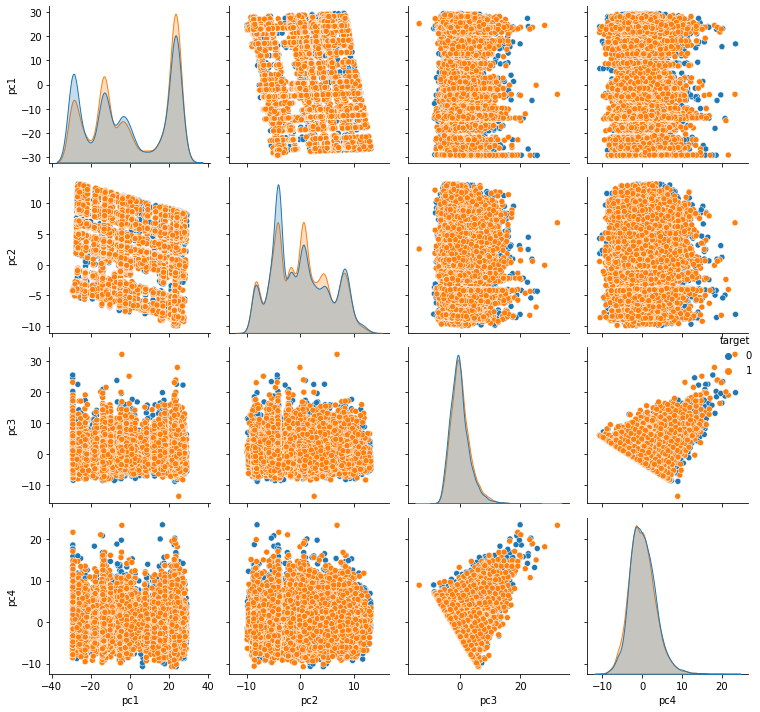

In [126]:
sns.pairplot(data=pdf, hue='target', diag_kind='kde')

plt.tight_layout()

## Skree Plot

In [127]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [416.88721734  27.75419197  10.98402412  10.75581921]
Explained variance ratio: [0.83219287 0.05540309 0.02192638 0.02147083]


<BarContainer object of 4 artists>

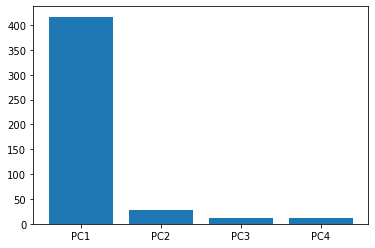

In [128]:
plt.bar(['PC1', 'PC2', 'PC3', 'PC4'], pca.explained_variance_)

<BarContainer object of 4 artists>

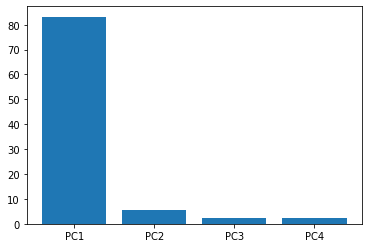

In [129]:
plt.bar(['PC1', 'PC2', 'PC3', 'PC4'], pca.explained_variance_ratio_ * 100)

## Reduksi Feature

In [131]:
pca = PCA(n_components=2)
pca.fit(X_under)
pcs = pca.transform(X_under)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])
X_std_pca['target'] = y
X_std_pca.head()

,pc1,pc2,target
0,16.683272,-8.321880,1
1,24.267761,8.399445,0
2,-9.731655,10.364483,0
3,22.828188,-9.118823,0
4,-29.109498,-4.193703,0


## Sampling Dataset

In [132]:
X_pca = X_std_pca.drop('target', axis=1)
y_pca = X_std_pca['target']

X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_pca,y_pca,
                                                test_size = 0.3,
                                                random_state = 123)

## Modeling with PCA

In [134]:
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=123)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X_pca, y_pca, cv=kfold,scoring='accuracy')
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 91.964% (0.496%)


In [135]:
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=123)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X_pca, y_pca, cv=kfold,scoring='roc_auc')
print("ROC AUC: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

ROC AUC: 50.619% (1.291%)


In [147]:
kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=123)
model = LogisticRegression()
results = model_selection.cross_validate(model, X_pca, y_pca, cv=kfold,scoring=['accuracy','roc_auc','f1','neg_log_loss'])
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,test_roc_auc,test_f1,test_neg_log_loss
0,0.036280,0.010957,0.917019,0.507099,0.0,-0.286041
1,0.026856,0.008972,0.912387,0.503148,0.0,-0.297474
2,0.032567,0.010088,0.928701,0.495254,0.0,-0.257754
3,0.032886,0.011551,0.924068,0.519968,0.0,-0.268816
4,0.041641,0.009966,0.923061,0.481917,0.0,-0.271577
5,0.024923,0.007973,0.914199,0.513225,0.0,-0.292891
6,0.019618,0.000000,0.916012,0.502672,0.0,-0.288518
7,0.043264,0.008979,0.924471,0.528699,0.0,-0.267784
8,0.033992,0.009967,0.919436,0.495304,0.0,-0.280188
9,0.032887,0.007974,0.917019,0.514662,0.0,-0.285989


In [148]:
X_pca

,pc1,pc2
0,16.683272,-8.321880
1,24.267761,8.399445
2,-9.731655,10.364483
3,22.828188,-9.118823
4,-29.109498,-4.193703
...,...,...
49645,23.670295,0.772329
49646,21.668199,0.911567
49647,23.460451,-1.313314
49648,22.890997,-5.918696
